In [7]:
%matplotlib nbagg 
import matplotlib.pyplot as plt
import numpy as np
import wavio as wv
import random as rd
import math as mt

def envelope(K ,nSamps, tt, tA, tR, sus, kA, kS, kD):
    tA /= K    
    tR /= K   
    sA = int(nSamps*tA)
    sD = int(nSamps*(tt-tR))   
    sS = nSamps - sA - sD
    def wexp(N, w):
        E = np.exp(w*np.linspace(0, 1, N)) - 1
        E = E/max(E)
        return E
    A = wexp( sA, kA )
    S = wexp( sS, kS )
    D = wexp( sD, kD )
    A = 1.-A[::-1]
    S = S[::-1]*(1-sus) + sus
    D = D[::-1]*sus
    env = np.concatenate([A,S,D])   
    return env

def play (frequency, linsp, nSamp, harmonics, vibmagn, vibfreq, tt, tA, tR, sus, kA, kS, kD):       
        wav = 0*linsp
        vibrate = linsp - np.cos( 2*np.pi*vibfreq*linsp )*vibmagn
        for j in range(len(harmonics)):            
            sinos = np.sin( 2*(j+1)*np.pi*frequency*vibrate  ) 
            wav = wav + harmonics[j]*sinos
        env = envelope(K, nSamp, tt, tA, tR, sus, kA, kS, kD)            
        new = np.multiply(wav,env)
        return new
          
notemap = {" ": 0}
for i in range(10):
    notemap[str(i)] = i
for i,j in enumerate('abcdefghi'):
    notemap[j] = -1-i

In [8]:
# Scale
N = 12; M = 7
Scales = {"Homayun"       : np.array([1,3,1,2,1,2,2]), 
          "Mahur"         : np.array([2,2,1,2,2,2,1]),
          "Shur"          : np.array([1,2,2,2,1,2,2]),
          "Dashti"        : np.array([1,2,2,2,1,2,2]),
          "Nava"          : np.array([2,1,2,2,2,1,2]),         
          "Esfehan"       : np.array([2,1,2,2,1,3,1]),
          "Bidad"         : np.array([2,1,2,2,1,3,1]),
          "Homayun2"      : np.array([2,1,3,1,2,1,2]),             
          "Chargah"       : np.array([1,3,1,2,1,3,1]),
          "MelodicMinor"  : np.array([2,1,2,2,2,2,1]),
          "HarmonicMajor" : np.array([2,2,1,2,1,3,1])}                             

In [16]:
# Melody and Rhythm
pi = "3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378"

bezendan = "56747774.07747774.07747654.06646546.04540464.06747774.07747774.09898799.09949494.08787688.48808484.09898799.09949494.08787688.48808484.48787688.48747070.07747654.06646546.04540464.06747774.07747774.09898799.09949494.08787688.48808484.09898799.09949494.08787688.48808484.48787688.48740470.07747654.06646546.04540464.06747774.07747774.0"
bezendanz = len(pi)*"1"+"8"

babakaram  = "121 0aba0.121 0120-cbcbc.bcb00-121 0aba0.10120-cbcbc .bcb00"
babakaramz = "113124444.11312448-62448.62448-112224444.62448-624444.62448"

babakaram  = "c...bcb0..0...2321-cbcb0.cbcb0."
babakaramz = "6...2448..6...2448-62448.62448"


melody = str.replace(babakaram,  ".", "")
melody = str.replace(melody,  "-", "")
time   = str.replace(babakaramz, ".", "")
time   = str.replace(time, "-", "")

length = min(len(melody),len(time))

K = 10; 
total = int(time[-1])*(K - 1)  # int(time[-1])+K-1 must be
for i in time [:length]: total = total + float(i)

In [17]:
rate = 44100             # samples per second
tempo = 200*4            # sample duration (seconds)
base = 437.0             # sound frequency (Hz)
sync_error = 20          # asynchrony max (mili seconds) 
pitch_error = 0.005      # frequency error ratio (scalar)
amp_error = .3           # amplitude error ratio (scalar)
volume = 0.5

old = []
for scale in ["Chargah"]: # list(Scales.keys()):
    s = Scales[scale]
    interval = 2**(float(1)/sum(s))
    scaleloop = np.concatenate([[0],s,s,s,s,s])
    ar = np.cumsum(scaleloop)-N*2
    
    pointer = 0
    totaltime = float(total)*60/tempo    
    air = int(sync_error/1000.*rate)
    sig = 0*np.linspace(0, 0, totaltime*rate + air, endpoint=False)
    for i in range(length):
        T = float(time[i])*60/tempo         
        nSamp = int(K*T*rate)
        linsp = np.linspace(0, K*T, nSamp, endpoint=False)         
        freq = base*interval**ar[notemap[melody[i]]+2*M]         

        # banjo
        note1 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,1,0.45,0.2,0.25,0.13,0.1,0.05,0.1,0.04,0.06,0.1,0,0.01,0.01,0.04,0.1,0.05,0.02,0.05],
                     vibmagn = 0, vibfreq = 3,
                     tt = 1, tA=.01, tR=.6, sus=.0, kA=2, kS=3, kD=1)
        
        # santoor
        note2 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,1,0.45,0.2,0.25,0.13,0.1,0.05,0.1,0.04,0.06,0.1,0,0.01,0.01,0.04,0.1,0.05,0.02,0.05],
                     vibmagn = 0, vibfreq = 3,
                     tt = 1, tA=.01, tR=.1, sus=.5, kA=2, kS=3, kD=4)          
        
        # oboe
        note3 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [1,0.5, 0.8, 0.1, 0.6],
                     vibmagn = .0005, vibfreq = 5,
                     tt = 1, tA=.2, tR=.9, sus=.8, kA=2, kS=3, kD=10)  
        
        # triangle
        note4 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,0.08,0.04,0.027,0.02,0.016,0.013,0.01,0.01,0.009,0.01,0.007,0.0066,0.006,0.0057,0.005,0.005,0.005,0.004],
                     vibmagn = 0.0005, vibfreq = 4,
                     tt = 1, tA=.01, tR=.1, sus=.95, kA=2, kS=3, kD=10)  
      
        # melodica
        note5 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.32,0.,0.11,0,0.06,0,0.045,0,0.035,0,0.029,0,0.024,0,0.02,0,0.018,0,0.016],
                     vibmagn = 0.001, vibfreq = 4,
                     tt = 1, tA=.01, tR=.99, sus=.9, kA=2, kS=3, kD=1)   
        
        # percussion
        wav = np.random.rand(len(linsp))*2-1       
        env = envelope( K, K*T*rate, tt = 1, tA=.04, tR=.9, sus=.0, kA=2, kS=9, kD=1)            
        note5 = np.multiply(wav,env)  
        
        allnotes = [note1, note2, note3, note4, note5]
               
        mute = 0 if melody[i] == ' ' else 1          
        allnotes = [note1, note2, note3, note4, note5]
        for j in [0,1,2,3,4]: #range(len(allnotes)):
            note = allnotes[j]   
            note = note * (1+(1-2*rd.random())*amp_error)
            async = sync_error/1000.*rate*(1-2*rd.random())
            offset = int(pointer+async)
            if offset < 1 : offset = 0              
            movednote = np.concatenate([ np.zeros(offset), note, np.zeros(len(sig)-len(note)-offset) ])                               
            sig = sig + mute * movednote 
                        
        pointer = pointer + T*rate
        
    filename = "../Desktop/yarmobarak/pi-"+ scale +".wav"
    wv.write(filename, sig*volume, rate, sampwidth=3)

    print filename, "done"

../Desktop/yarmobarak/pi-Chargah.wav done


In [ ]:
plt.plot (sig, 'k')

In [540]:
# Vibration check
vibmagn = 0.005
vibfreq = 7
vibrate = linsp - np.cos( 2*np.pi*vibfreq*linsp )*vibmagn
plt.plot (vibrate)

In [547]:
#envelope check
K = 5
env = envelope( K, K*T*rate,  tt = 1, tA=.01, tR=.1, sus=.9, kA=2, kS=3, kD=1)
#env = envelope( K, K*T*rate, tt = 1, tA=.1, tR=.6, sus=.75, kA=4, kS=2, kD=3)
plt.plot(env[1:len(env)/K])

<IPython.core.display.Javascript object>


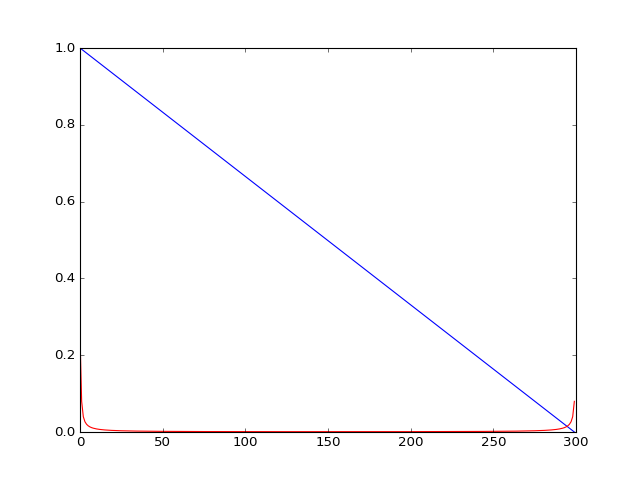

In [402]:
# harmonic check
n = 300
import numpy.fft
signal = [0]*int(n/2) + [.99]*n + [0]*int(n/2)
signal = 1-np.linspace(0,1,n)
plt.plot(signal, 'b')
A = numpy.fft.fft(signal)/2/n
plt.plot(abs(A), 'r')

In [ ]:
rate = 44100             # samples per second
tempo = 200*4            # sample duration (seconds)
base = 437.0             # sound frequency (Hz)
sync_error = 20          # asynchrony max (mili seconds) 
pitch_error = 0.005      # frequency error ratio (scalar)
amp_error = .3           # amplitude error ratio (scalar)
volume = 0.5

old = []
for scale in ["Chargah"]: # list(Scales.keys()):
    s = Scales[scale]
    interval = 2**(float(1)/sum(s))
    scaleloop = np.concatenate([[0],s,s,s,s,s])
    ar = np.cumsum(scaleloop)-N*2
    
    pointer = 0
    totaltime = float(total)*60/tempo    
    air = int(sync_error/1000.*rate)
    sig = 0*np.linspace(0, 0, totaltime*rate + air, endpoint=False)
    for i in range(length):
        T = float(time[i])*60/tempo         
        nSamp = int(K*T*rate)
        linsp = np.linspace(0, K*T, nSamp, endpoint=False)         
        freq = base*interval**ar[notemap[melody[i]]+2*M]         

        # banjo
        note1 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,1,0.45,0.2,0.25,0.13,0.1,0.05,0.1,0.04,0.06,0.1,0,0.01,0.01,0.04,0.1,0.05,0.02,0.05],
                     vibmagn = 0, vibfreq = 3,
                     tt = 1, tA=.01, tR=.6, sus=.0, kA=2, kS=3, kD=1)
        
        # santoor
        note2 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,1,0.45,0.2,0.25,0.13,0.1,0.05,0.1,0.04,0.06,0.1,0,0.01,0.01,0.04,0.1,0.05,0.02,0.05],
                     vibmagn = 0, vibfreq = 3,
                     tt = 1, tA=.01, tR=.1, sus=.5, kA=2, kS=3, kD=4)          
        
        # oboe
        note3 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [1,0.5, 0.8, 0.1, 0.6],
                     vibmagn = .0005, vibfreq = 5,
                     tt = 1, tA=.2, tR=.9, sus=.8, kA=2, kS=3, kD=10)  
        
        # triangle
        note4 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.25,0.08,0.04,0.027,0.02,0.016,0.013,0.01,0.01,0.009,0.01,0.007,0.0066,0.006,0.0057,0.005,0.005,0.005,0.004],
                     vibmagn = 0.0005, vibfreq = 4,
                     tt = 1, tA=.01, tR=.1, sus=.95, kA=2, kS=3, kD=10)  
      
        # melodica
        note5 = play (freq * (1+(1-2*rd.random())*pitch_error), linsp, nSamp,
                     [0.32,0.,0.11,0,0.06,0,0.045,0,0.035,0,0.029,0,0.024,0,0.02,0,0.018,0,0.016],
                     vibmagn = 0.001, vibfreq = 4,
                     tt = 1, tA=.01, tR=.99, sus=.9, kA=2, kS=3, kD=1)   
        
        # percussion
        wav = np.random.rand(len(linsp))*2-1       
        env = envelope( K, K*T*rate, tt = 1, tA=.04, tR=.9, sus=.0, kA=2, kS=9, kD=1)            
        note5 = np.multiply(wav,env)  
        
        allnotes = [note1, note2, note3, note4, note5]
               
        mute = 0 if melody[i] == ' ' else 1          
        allnotes = [note1, note2, note3, note4, note5]
        for j in [0,1,2,3,4]: #range(len(allnotes)):
            note = allnotes[j]   
            note = note * (1+(1-2*rd.random())*amp_error)
            async = sync_error/1000.*rate*(1-2*rd.random())
            offset = int(pointer+async)
            if offset < 1 : offset = 0              
            movednote = np.concatenate([ np.zeros(offset), note, np.zeros(len(sig)-len(note)-offset) ])                               
            sig = sig + mute * movednote 
                        
        pointer = pointer + T*rate
        
    filename = "../Desktop/yarmobarak/pi-"+ scale +".wav"
    wv.write(filename, sig*volume, rate, sampwidth=3)

    print filename, "done"